#                                       LOGISTIC REGRESSION

* Importing important libraries that we will be using for our program.
* Libraries numpy, os, pandas, matplotlib, sklearn and their subest libraries.


In [1]:
import numpy as np #used for working with arrays.
import os #used to work with directories
import pandas as pd #used for working with data manipulation and analysis
from matplotlib import pyplot as plt #used for plotting graphs
from sklearn import preprocessing #used for scaling the data
from sklearn.metrics import confusion_matrix #used to generate confusion matrix from which we will be calculating our accuracy
from sklearn.model_selection import train_test_split #used to divide our data into training , validataion and test data

os.getcwd() ## to get the working directory
os.chdir("D:\\University At Buffalo\\Courses\\Introduction to ML\\Project") ## to change the working directory

# 1. Extract features values and Image Ids from the data

In [2]:
BCData=pd.read_csv("wdbc.csv",header=None) ## to import the csv file
BCData.shape # to know the dimensions of the data which is 569 rows and 32 columns.

(569, 32)

In [3]:
BCData.columns = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave.points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave.points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave.points_worst','symmetry_worst','fractal_dimension_worst']
# to include headers in the data to make it easy to understand

In [4]:
BCData.head() ## to know the first five rows which includes headers and all columns 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
del BCData['id'] #to drop the column id as it is not significant variable for training our model

In [6]:
BCData.shape #checking dimension after dropping one column which is 569 rows and 31 columns

(569, 31)

In [7]:
BCData['diagnosis'] = BCData['diagnosis'].map({'M': 1, 'B': 0}) # to change the values of our target variable to 0 and 1 accordingly so that we can use it in our training.

In [8]:
# Putting feature variable to x
x = BCData[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave.points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave.points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave.points_worst","symmetry_worst","fractal_dimension_worst"]]

# Putting target variable to y
y = BCData[["diagnosis"]]

x=pd.DataFrame(x) #creating a dataframe for x
y=pd.DataFrame(y) #creating a dataframe for y
#random_state is the seed used by the random number generator. It can be any integer.




# 2. Data Partitioning:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80,test_size=0.20 , random_state=100) #splitting the data according to Train and Test
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.50, random_state=100) #splitting the Test data according to Validate and Test

C:\Users\Rohit Vishwakarma\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
## Normalize the data x data so that it is in the range of 0 o 1... we dont need to normalize y as it is in the range of 0 and 1

scaledata=preprocessing.MinMaxScaler()
X_train = scaledata.fit_transform(x_train)
X_test = scaledata.fit_transform(x_test)
X_val = scaledata.fit_transform(x_val)

In [11]:
X_train,X_test,X_val = X_train.T,X_test.T,X_val.T #transposing the data to use it further for traning model
Y_train,Y_test,Y_val= y_train.values.reshape(1,y_train.shape[0]),y_test.values.reshape(1,y_test.shape[0]),y_val.values.reshape(1,y_val.shape[0])

# 3. Train using Logistic Regression

In [12]:
def sigmoid(z): #Sigmoid Function - This is actual logisitc regression function that we will be using to return predicted y as per corresponding x values
    return 1 / (1 + np.exp(-z))

epochs_array=[]
def model_function(X_train,Y_train,epochs,learningrate): #the function we will be using to train the data using gradient descent to get best accuracy with corresponding hyper parameters i.e learning rate and epochs
    global w,b,epochs_array,learningrate_array,losstrack
    losstrack = [] #used for generating the cost function 
    m=X_train.shape[1]
    w = np.zeros((X_train.shape[0],1))
    b = 0
    
    #Number of Training instances
    for epoch in range(epochs):
        z = np.dot(w.T, X_train) + b
        p = sigmoid(z)
        cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m
        losstrack.append(cost)
        dz = p-Y_train
        dw = (1 / m) * np.dot(X_train, dz.T)
        db = (1 / m) * np.sum(dz)
        w = w - learningrate * dw
        b = b - learningrate * db
        epochs_array.append(epoch)
    return w,b
      
 # Predict function to predict y for a generated (w,b) and X_value   
def predict_function(X_value):
    z = np.dot(w.T, X_value) + b
    p = sigmoid(z)
    predicted_y=(p>0.5)
    return 1*predicted_y

accuracies=[]

#Generating confusion matrix with the predicted y value and original y of our data
def calculate_accuracy(predicted_Y_train,Y_train):
    global accuracies
    matrix_indi_value=confusion_matrix(Y_train[0], predicted_Y_train[0])
    print(confusion_matrix(Y_train[0], predicted_Y_train[0]))
    
    #TP : True Positive , TN : True Negative , FN : False Negative, FP : False Positive
    TP=matrix_indi_value[0,0]
    TN=matrix_indi_value[1,1]
    FN=matrix_indi_value[0,1]
    FP=matrix_indi_value[1,0]
    
    Accuracy=(TP+TN)/(TP+TN+FN+FP) #Giving accuracy of our model 
    print("\nAccuracy\n :",Accuracy)
        
    Precision=(TP)/(TP+FP) #for all instances classified positive, what percent was correct?
    print("\nPrecision\n :",Precision)
       
    Recall=(TP)/(TP+FN) #for all instances that were actually positive, what percent was classified correctly?
    print("\nRecall\n :",Recall)
    names = ['Accuracy', 'Precision', 'Recall']
    
    accuracies.append(Accuracy)
    
        
    

# 4. Tune hyper-parameters


 ------- Training Data -------

[[290   2]
 [ 16 147]]

Accuracy
 : 0.9604395604395605

Precision
 : 0.9477124183006536

Recall
 : 0.9931506849315068

 ------- Validation Data -------

[[33  0]
 [ 1 23]]

Accuracy
 : 0.9824561403508771

Precision
 : 0.9705882352941176

Recall
 : 1.0


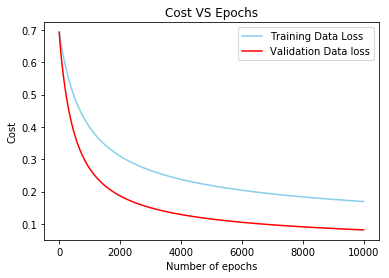

In [13]:
# Fixing epochs=10000 and changing the learning rate

#1st run with learning rate=0.02
# ---------------------------- TRAINING DATA --------------------------------------------
w_final,b_final=model_function(X_train,Y_train,10000,0.02)
predicted_Y_train=(predict_function(X_train))
print("\n ------- Training Data -------\n")
calculate_accuracy(predicted_Y_train,Y_train)
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data Loss")

# ---------------------------- VALIDATION DATA -------------------------------------------
w_final,b_final=model_function(X_val,Y_val,10000,0.02)
predicted_Y_val=(predict_function(X_val))
print("\n ------- Validation Data -------\n")
calculate_accuracy(predicted_Y_val,Y_val)
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()
plt.show()

#plt.plot(epochs_array,accuracies)



 ------- Training Data -------

[[290   2]
 [ 10 153]]

Accuracy
 : 0.9736263736263736

Precision
 : 0.9666666666666667

Recall
 : 0.9931506849315068

 ------- Validation Data -------

[[33  0]
 [ 1 23]]

Accuracy
 : 0.9824561403508771

Precision
 : 0.9705882352941176

Recall
 : 1.0


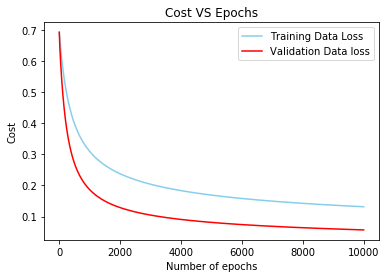

In [14]:
#2nd run with learning rate=0.04
# ------------------------------ TRAINING DATA --------------------------------------------
w_final,b_final=model_function(X_train,Y_train,10000,0.04)
predicted_Y_train=(predict_function(X_train))
print("\n ------- Training Data -------\n")
calculate_accuracy(predicted_Y_train,Y_train)
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data Loss")

#------------------------------- VALIDATION DATA -------------------------------------------
w_final,b_final=model_function(X_val,Y_val,10000,0.04)
predicted_Y_val=(predict_function(X_val))
print("\n ------- Validation Data -------\n")
calculate_accuracy(predicted_Y_val,Y_val)
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()


 ------- Training Data -------

[[291   1]
 [  8 155]]

Accuracy
 : 0.9802197802197802

Precision
 : 0.9732441471571907

Recall
 : 0.9965753424657534

 ------- Validation Data -------

[[33  0]
 [ 1 23]]

Accuracy
 : 0.9824561403508771

Precision
 : 0.9705882352941176

Recall
 : 1.0


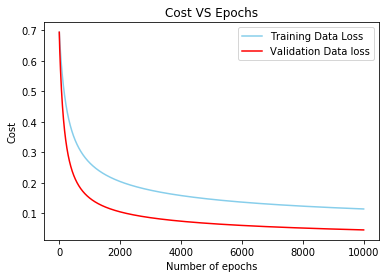

In [15]:
#3rd run with learning rate=0.06
# ---------------------------- TRAINING DATA --------------------------------------------
w_final,b_final=model_function(X_train,Y_train,10000,0.06)
predicted_Y_train=(predict_function(X_train))
print("\n ------- Training Data -------\n")
calculate_accuracy(predicted_Y_train,Y_train)
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data Loss")

# ---------------------------- VALIDATION DATA --------------------------------------------
w_final,b_final=model_function(X_val,Y_val,10000,0.06)
predicted_Y_val=(predict_function(X_val))
print("\n ------- Validation Data -------\n")
calculate_accuracy(predicted_Y_val,Y_val)
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()

# 5. Test your machine learning scheme on the testing set

In [16]:
#Testing the test_data with the best accuracy of the models with the current hypermaters i.e Learning rate = 0.10 , Epochs = 10000 and current w and b

z = np.dot(w_final.T, X_test) + b_final
p = sigmoid(z)
predicted_Y_test=(p>0.5)
    
print("\n ------- Test Data -------\n")
calculate_accuracy(predicted_Y_test,Y_test)



 ------- Test Data -------

[[31  1]
 [ 6 19]]

Accuracy
 : 0.8771929824561403

Precision
 : 0.8378378378378378

Recall
 : 0.96875
